In [45]:
print("Helllo PClub")

Helllo PClub


In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
import gradio as gd 


In [47]:
df = pd.read_csv(r'D:\Ayush\Python\train.csv')

In [48]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [49]:
df.dropna(axis= 'columns') # to remove the columns with any empty spaces in columns


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [50]:
cols_with_missing = [col for col in df.columns if df[col].isnull().any()] # to check the value of any null spaces and dropping them simuntaneously
df = df.drop(cols_with_missing,axis = 1)
df


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [51]:
df = df.drop('Id',axis = 1) # removing the id column as it is not needed
df

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [52]:
df = df.select_dtypes(exclude=[object])# Remove the columns with string as they won't be helpful in prediction
df


,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0,0,953,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,13175,6,6,1978,1988,790,163,589,1542,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,9042,7,9,1941,2006,275,0,877,1152,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,9717,5,6,1950,1996,49,1029,0,1078,...,366,0,112,0,0,0,0,4,2010,142125


In [53]:
# In the same way removing year built, year of remodelling, year sold, and month sold as they are also not needed
df = df.drop('YearBuilt',axis =1)
df = df.drop('YearRemodAdd',axis =1)
df = df.drop('YrSold',axis =1)
df = df.drop('MoSold',axis =1)
df.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice'],
      dtype='object')

In [54]:
#BsmtFinSF1m,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageCars,GarageArea

In [55]:
df.iloc[3]# random row to get a hang of the data

MSSubClass           70
LotArea            9550
OverallQual           7
OverallCond           5
BsmtFinSF1          216
BsmtFinSF2            0
BsmtUnfSF           540
TotalBsmtSF         756
1stFlrSF            961
2ndFlrSF            756
LowQualFinSF          0
GrLivArea          1717
BsmtFullBath          1
BsmtHalfBath          0
FullBath              1
HalfBath              0
BedroomAbvGr          3
KitchenAbvGr          1
TotRmsAbvGrd          7
Fireplaces            1
GarageCars            3
GarageArea          642
WoodDeckSF            0
OpenPorchSF          35
EnclosedPorch       272
3SsnPorch             0
ScreenPorch           0
PoolArea              0
MiscVal               0
SalePrice        140000
Name: 3, dtype: int64

In [56]:
array_bana = df.to_numpy()# to operate converting the dataframe into array
array_bana

array([[    60,   8450,      7, ...,      0,      0, 208500],
       [    20,   9600,      6, ...,      0,      0, 181500],
       [    60,  11250,      7, ...,      0,      0, 223500],
       ...,
       [    70,   9042,      7, ...,      0,   2500, 266500],
       [    20,   9717,      5, ...,      0,      0, 142125],
       [    20,   9937,      5, ...,      0,      0, 147500]], dtype=int64)

In [57]:
mean = np.mean(array_bana,axis = 0)     # normalization to reduce errors                            
standa = np.std(array_bana,axis = 0)                                   

sudhra_array = (array_bana - mean)/standa

print(sudhra_array.shape)

(1460, 30)


In [58]:
sudhra_array

array([[ 0.07337496, -0.20714171,  0.65147924, ..., -0.06869175,
        -0.08768781,  0.34727322],
       [-0.87256276, -0.09188637, -0.07183611, ..., -0.06869175,
        -0.08768781,  0.00728832],
       [ 0.07337496,  0.07347998,  0.65147924, ..., -0.06869175,
        -0.08768781,  0.53615372],
       ...,
       [ 0.30985939, -0.14781027,  0.65147924, ..., -0.06869175,
         4.95311151,  1.07761115],
       [-0.87256276, -0.08016039, -0.79515147, ..., -0.06869175,
        -0.08768781, -0.48852299],
       [-0.87256276, -0.05811155, -0.79515147, ..., -0.06869175,
        -0.08768781, -0.42084081]])

In [59]:
y = df[['SalePrice']] # training ke liye price alag kar li
x = np.delete(sudhra_array,29,axis =1)# Removing the same column from our normalized array
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.15,random_state=42,shuffle=True)  
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1241, 29) (219, 29) (1241, 1) (219, 1)


In [60]:
# importing Necessary Libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [61]:
knn_regressor = KNeighborsRegressor(n_neighbors=5,metric='euclidean',weights='distance')# using the regressor algorithm
knn_regressor.fit(x_train, y_train)
y_pred = knn_regressor.predict(x_test)

In [62]:
# param_grid = {'n_neighbors': get, 'metric': ['euclidean', 'manhattan']}
# grid_search = GridSearchCV(knn_regressor, param_grid, cv=5)
# grid_search.fit(x_train, y_train)
# best_params = grid_search.best_params_
# best_params



In [63]:
from sklearn.metrics import mean_squared_error# Mean Squared error 
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")


Mean Squared Error: 1507197633.3557


In [64]:
from sklearn.metrics import r2_score# as the dataset was very big so one big value ca alter the mse so calculating Rscore

r_squared = r2_score(y_test, y_pred)

print(f"R-squared: {r_squared:.4f}")


R-squared: 0.8144


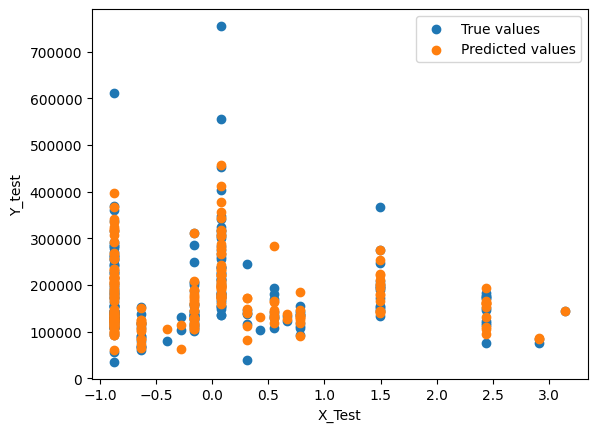

In [65]:
plt.scatter(x_test[:, 0], y_test, label="True values")
plt.scatter(x_test[:, 0], y_pred, label="Predicted values")# visual representation of true and predicted values
plt.xlabel("X_Test")
plt.ylabel("Y_test")
plt.legend()
plt.show()


In [66]:
def tukka(Lotarea,Quality,codition,rooms,GarageArea,poolarea):
     raw = [70,Lotarea,Quality,codition,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,rooms,1,3,GarageArea,0,35,272,0,0,poolarea,0]
#raw = [70,9660,7,5,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,5,1,3,82,0,35,272,0,0,0,0]
     raw = np.array(raw,dtype=np.float64).reshape(1,-1)
    #raw = raw.reshape(-1,1)
     answer = knn_regressor.predict(raw)
     answer = float(answer[0][0])

     return answer 

In [67]:
tukka(9550,7,5,7,642,0)

268611.79171702435

In [68]:
def process_input(input_text):
    return f"You pressed the button! Input: {input_text}"

# Define a function to be executed when the button is pressed
def on_button_click():
    # Perform any computation here
    # You can access the input values or any other data from the interface
    print("Button clicked!")

In [69]:
# Gradio interface
iface = gd.Interface(
     tukka,
    [gd.Textbox(lines=1, placeholder="Enter Area"),gd.Textbox(lines=1, placeholder="Enter Quality Required"),gd.Textbox(lines=1, placeholder="Enter Condition Required"),gd.Textbox(lines=1, placeholder="Enter Rooms Required"),gd.Textbox(lines=1, placeholder="Enter Garage Area"),gd.Textbox(lines=1, placeholder="Enter Pool Area")],
    "textbox",
    live=True,
)




iface.launch(share= True)

Running on local URL:  http://127.0.0.1:7864
Running on public URL: https://f1dbb58bab7b8928dc.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [70]:
test_data = pd.read_csv(r"D:\Ayush\Python\test.csv")
test_data
#test_data.dropna(axis= 'columns')
#cols_with_missing = [col for col in test_data.columns if test_data[col].isnull().any()]
#test_data = test_data.drop(cols_with_missing,axis = 1)
test_data = test_data.drop('Id',axis = 1) 
#test_data = test_data.select_dtypes(exclude=[object])
humara_test = test_data[['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']]
test_data = test_data.drop('YearBuilt',axis =1)
test_data = test_data.drop('YearRemodAdd',axis =1)
test_data = test_data.drop('YrSold',axis =1)
test_data = test_data.drop('MoSold',axis =1)
testdata_array = test_data.to_numpy()
humara_test.columns
humara_test = humara_test.fillna(0)

In [71]:
Humara_price = knn_regressor.predict(humara_test)

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


In [72]:
Humara_price = [item for some in Humara_price for item in some]
Humara_price

[268610.37868759024,
 244486.88053234815,
 268606.4473622864,
 268610.42289960803,
 268613.0009816164,
 268612.03500472475,
 268611.5284654719,
 268615.2526022644,
 268609.4853109057,
 268614.5712113322,
 268608.3321992556,
 268605.8740732067,
 245187.50227150417,
 245167.20503112656,
 268616.936229629,
 268605.268009133,
 268606.62893906893,
 268606.81230051373,
 268604.8203893037,
 268600.46309381764,
 268604.2654192428,
 268612.9887983787,
 268603.5258428394,
 268609.4856038446,
 268608.73688411084,
 268613.4701444542,
 268602.6083032996,
 268609.1436887373,
 268612.19688812585,
 268606.91233243886,
 268609.37381703773,
 268613.7761834166,
 268605.74005677825,
 268606.2953207412,
 268605.54059803084,
 268600.93495841406,
 268610.73477307725,
 268620.7057341042,
 268610.9496851811,
 268609.2738963196,
 268605.5349504385,
 268618.17147594574,
 268605.5560144241,
 268611.5774296798,
 268608.7597761722,
 268606.43485277105,
 268605.3731526794,
 268602.6130720361,
 268612.08113695536,
 2

In [73]:
humara_test['MeraAnuman'] = Humara_price
humara_test

,MSSubClass,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MeraAnuman
0,20,11622,5,6,468.0,144.0,270.0,882.0,896,0,...,1.0,730.0,140,0,0,0,120,0,0,268610.378688
1,20,14267,6,6,923.0,0.0,406.0,1329.0,1329,0,...,1.0,312.0,393,36,0,0,0,0,12500,244486.880532
2,60,13830,5,5,791.0,0.0,137.0,928.0,928,701,...,2.0,482.0,212,34,0,0,0,0,0,268606.447362
3,60,9978,6,6,602.0,0.0,324.0,926.0,926,678,...,2.0,470.0,360,36,0,0,0,0,0,268610.422900
4,120,5005,8,5,263.0,0.0,1017.0,1280.0,1280,0,...,2.0,506.0,0,82,0,0,144,0,0,268613.000982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,1936,4,7,0.0,0.0,546.0,546.0,546,546,...,0.0,0.0,0,0,0,0,0,0,0,268619.771267
1455,160,1894,4,5,252.0,0.0,294.0,546.0,546,546,...,1.0,286.0,0,24,0,0,0,0,0,268605.608105
1456,20,20000,5,7,1224.0,0.0,0.0,1224.0,1224,0,...,2.0,576.0,474,0,0,0,0,0,0,268602.133311
1457,85,10441,5,5,337.0,0.0,575.0,912.0,970,0,...,0.0,0.0,80,32,0,0,0,0,700,268612.263912
